In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk # for text processing
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # text processing
import missingno as mns # check for missing values
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: >

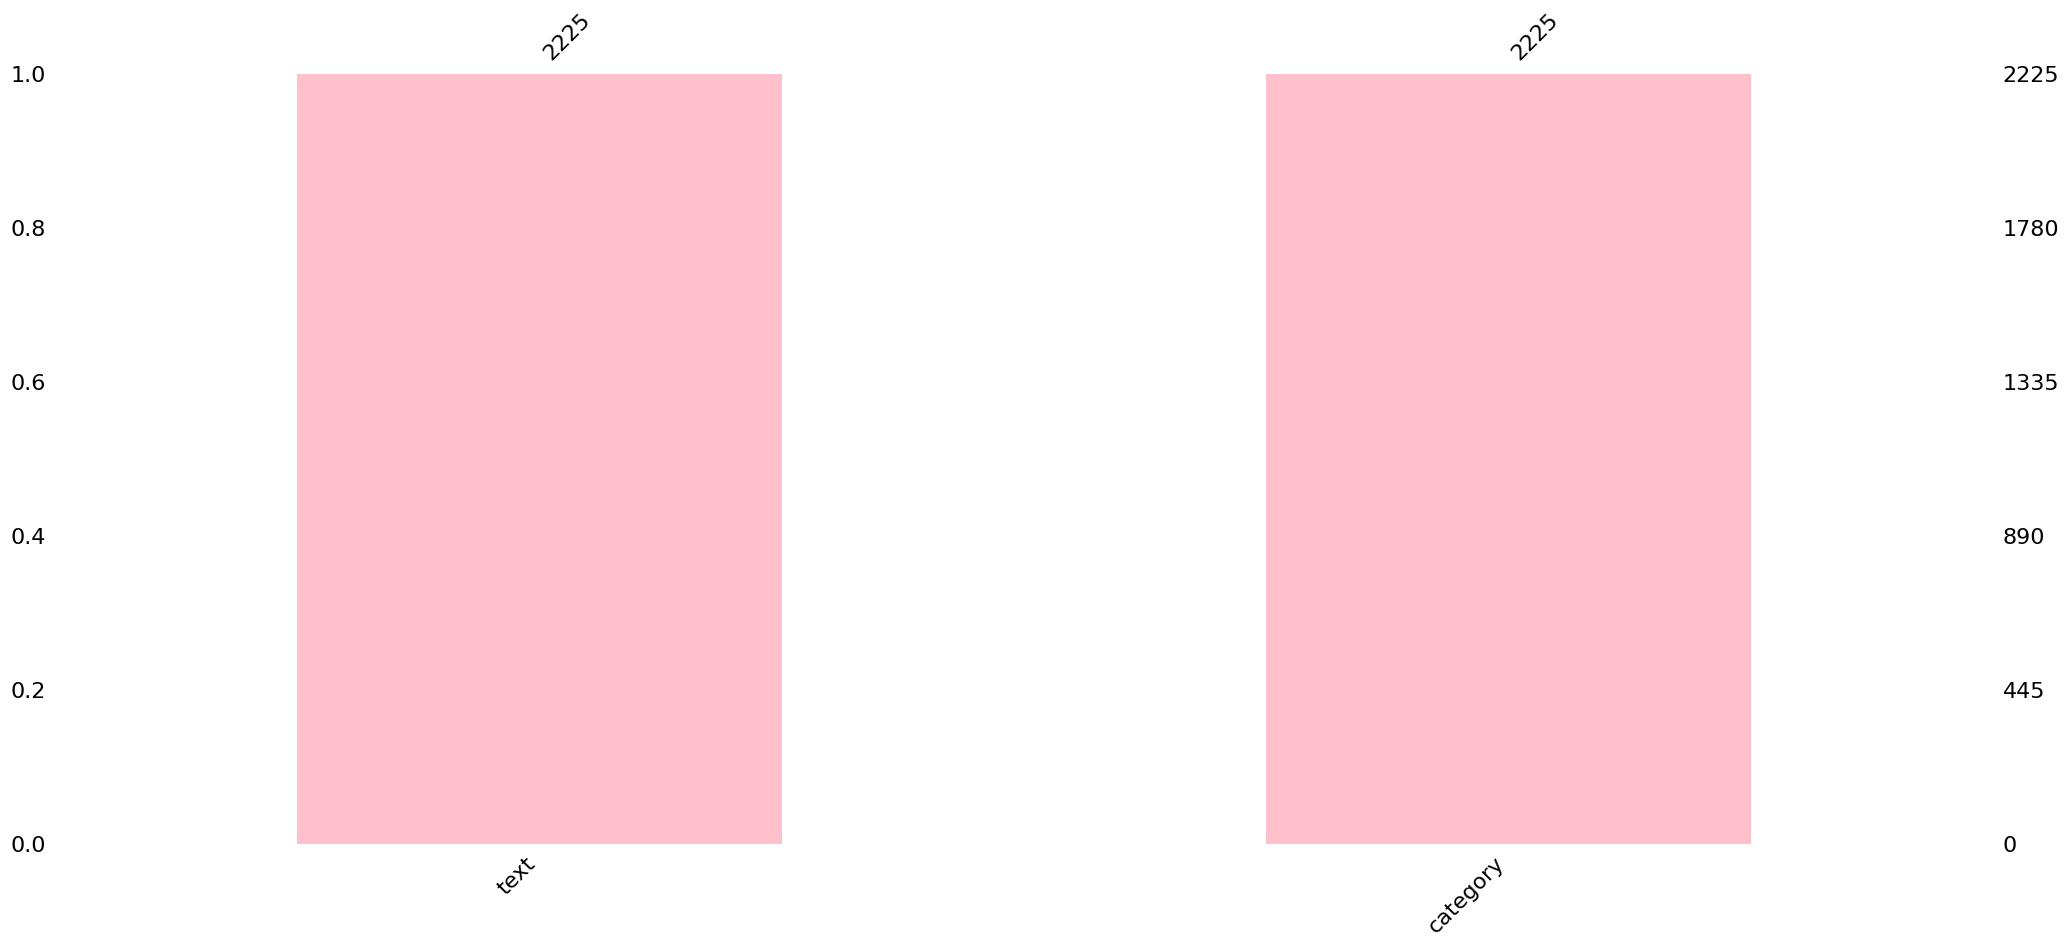

In [3]:
mns.bar(df,color='pink',sort = 'descending')  

In [4]:
import nltk
from nlkt.corpus import stopwords
from nltk.tokenize import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['cleaned_text'] = df['text'].apply(remove_stopwords)

ModuleNotFoundError: No module named 'nlkt'

In [ ]:
from collections import Counter
wordlist = ' '.join(df['text'])
words = wordlist.split()
word_counts = Counter(words)
top_20_words = dict(word_counts.most_common(20))
least_20_words = dict(word_counts.most_common()[:-21:-1])
fig, axes = plt.subplot(1,2 figsize(10,8))
axes[0].bar(top_20_words), top_20_words.values(), color = 'blue'
axes[0].set_title('Top 20 Words')

SyntaxError: cannot assign to function call (<ipython-input-22-dc08285d936c>, line 8)

In [ ]:
top_20_words

{'the': 52567,
 'to': 24955,
 'of': 19947,
 'and': 18561,
 'a': 18251,
 'in': 17570,
 's': 9007,
 'for': 8884,
 'is': 8515,
 'that': 8135,
 'it': 7584,
 'on': 7460,
 'was': 6016,
 'he': 5933,
 'be': 5765,
 'with': 5313,
 'said': 5072,
 'as': 4976,
 'has': 4952,
 'have': 4745}

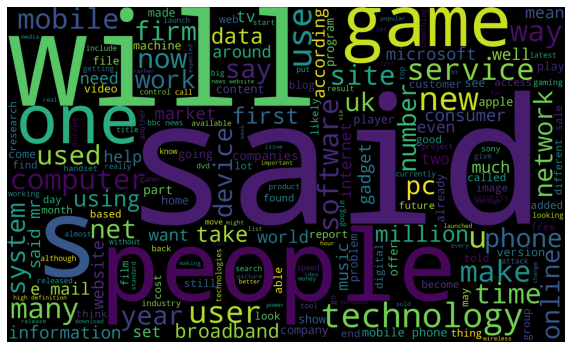

In [ ]:
newdata = df[df['category'] == 'tech']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split() # the words with join split it and remove the following
                     if 'http' not in word and not word.startswith('@')
                     and word != 'RT']) # if the data is clean, dont bother cleaning just assign words.split() to cleanword
WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1500).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

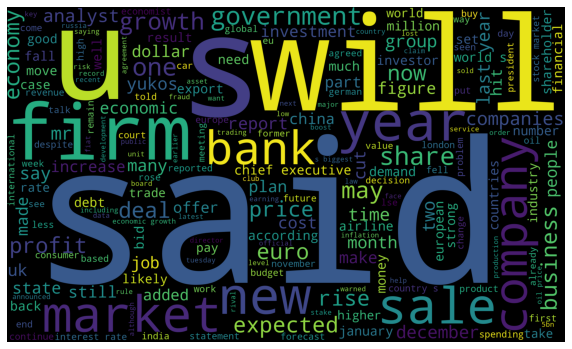

In [ ]:
newdata = df[df['category'] == 'business']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split() # the words with join split it and remove the following
                     if 'http' not in word and not word.startswith('@')
                     and word != 'RT']) # if the data is clean, dont bother cleaning just assign words.split() to cleanword
WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1500).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

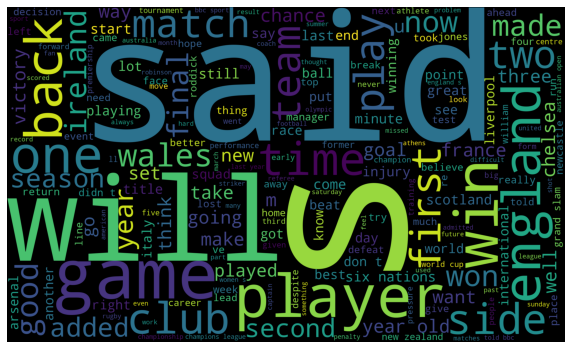

In [ ]:
newdata = df[df['category'] == 'sport']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split() # the words with join split it and remove the following
                     if 'http' not in word and not word.startswith('@')
                     and word != 'RT']) # if the data is clean, dont bother cleaning just assign words.split() to cleanword
WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1500).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

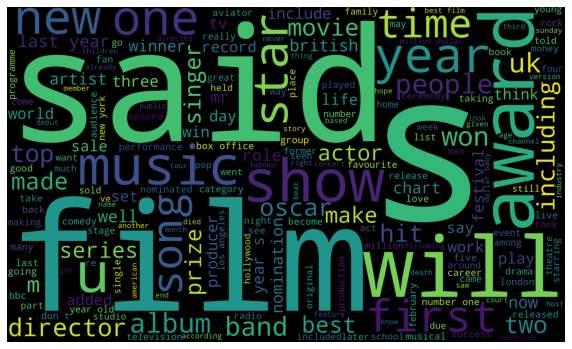

In [ ]:
newdata = df[df['category'] == 'entertainment']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split() # the words with join split it and remove the following
                     if 'http' not in word and not word.startswith('@')
                     and word != 'RT']) # if the data is clean, dont bother cleaning just assign words.split() to cleanword
WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1500).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

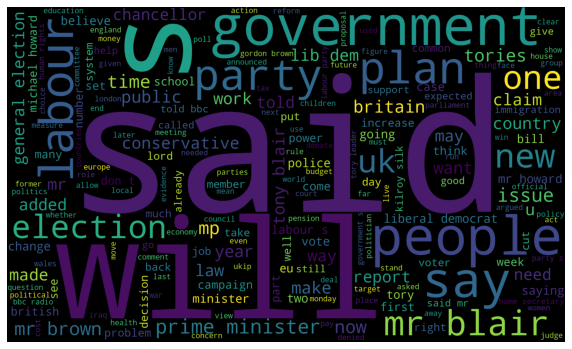

In [ ]:
newdata = df[df['category'] == 'politics']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split() # the words with join split it and remove the following
                     if 'http' not in word and not word.startswith('@')
                     and word != 'RT']) # if the data is clean, dont bother cleaning just assign words.split() to cleanword
WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=1500).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [ ]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [ ]:
x= df.text # text classification will always be x
y = df['category'] # dependent variable

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=400)

In [ ]:
naivebayes = Pipeline([('vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',BernoulliNB())])
nlp = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [ ]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

In [ ]:
pred1 = naivebayes.predict(xtest)
pred1

array(['politics', 'sport', 'business', 'sport', 'entertainment',
       'politics', 'tech', 'sport', 'sport', 'sport', 'business',
       'entertainment', 'business', 'politics', 'tech', 'business',
       'entertainment', 'sport', 'politics', 'tech', 'business',
       'business', 'entertainment', 'politics', 'tech', 'sport',
       'business', 'business', 'politics', 'business', 'politics',
       'business', 'sport', 'entertainment', 'sport', 'sport', 'business',
       'tech', 'business', 'business', 'sport', 'business', 'sport',
       'business', 'entertainment', 'sport', 'business', 'entertainment',
       'sport', 'business', 'entertainment', 'business', 'entertainment',
       'business', 'sport', 'sport', 'politics', 'business',
       'entertainment', 'tech', 'business', 'entertainment', 'politics',
       'sport', 'business', 'tech', 'sport', 'politics', 'sport',
       'politics', 'entertainment', 'politics', 'business', 'business',
       'sport', 'tech', 'entertainment'

In [ ]:
print(classification_report(ytest,pred1))

               precision    recall  f1-score   support

     business       0.90      0.98      0.94       111
entertainment       0.97      0.91      0.94        77
     politics       0.92      0.93      0.93        73
        sport       1.00      1.00      1.00       112
         tech       0.98      0.90      0.94        72

     accuracy                           0.95       445
    macro avg       0.96      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



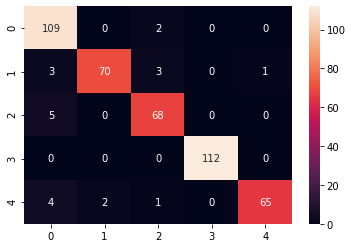

In [ ]:
cm = confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot = True, fmt ='0.5g') # recall is used to interpret the confusion matrix